In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi",                
               "Claudia Wagner",
               "Markus Strohmaier"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style='text-align:center;'>Inequalities in Directed Networks</h1>

<h2>Dependencies</h2>

In [2]:
import warnings
warnings.simplefilter("ignore")
warnings.warn("deprecated", DeprecationWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import os
import sys
import numpy as np
import matplotlib.pyplot as plt


In [3]:
%load_ext autoreload
%autoreload 2
sys.path.append('../code')

from org.gesis.libs import io
from org.gesis.libs import viz
from org.gesis.libs import ranking
from org.gesis.libs import network
from org.gesis.libs.utils import printf

<h2>Constants</h2>

In [89]:
DATASETS = ['aps', 'apsgender3', 'apsgender8', 'github', 'pokec', 'wikipedia'] #'twitter'
MODELS = ['DH', 'DBA', 'DHBA']
MODEL = 'DHBA'
ROOT = '../data/'
PLOTS = '../plots/'
OUTPUT = "../results-batch/"

<h2>I. Evidence from Empirical Networks</h2>

In [5]:
fn = os.path.join(OUTPUT, 'summary_datasets.csv')
df_summary_empirical = io.read_csv(fn)
df_summary_empirical

,dataset,N,cc,class,m,M,fm,E,Emm,EMM,...,gammaM,kminM,kmaxM,gammam,kminm,kmaxm,hMM,hmm,triadsratio,triadspdf
0,APS,1853,173,pacs,05.20.-y,05.30.-d,0.375607,3638,0.294393,0.649808,...,2.880254,4.0,15.0,5.020234,5.0,9.0,0.95,0.93,7.741234e-07,"[0.0, 0.2602935911206588, 0.0, 0.6942355889724..."
1,APSgender3,9679,174,gender,female,male,0.102180,174760,0.014574,0.818076,...,4.913199,105.0,283.0,1.830627,11.0,230.0,0.82,0.27,6.067675e-06,"[0.0, 0.002463174282732545, 0.0, 0.74432729978..."
2,APSgender8,10059,300,gender,female,male,0.105080,183067,0.011477,0.829166,...,1.855324,13.0,466.0,1.914697,11.0,416.0,0.50,0.60,2.384959e-05,"[0.0, 0.0006445705130733074, 0.0, 0.7775175926..."
3,Github,296612,6965,gender,female,male,0.058555,1723930,0.004976,0.898512,...,2.847932,60.0,7588.0,2.661940,21.0,7994.0,0.55,0.61,2.551588e-10,"[0.00012062479001814398, 0.0006425589775966516..."
4,Pokec,1632636,1,gender,1,0,0.492660,30622117,0.195174,0.249719,...,4.506221,131.0,3878.0,3.850320,109.0,8763.0,0.51,0.38,2.853004e-11,"[0.043744452862550076, 0.0685444396945499, 0.0..."
5,Wikipedia,3159,66,gender,female,male,0.152263,14890,0.030222,0.784688,...,3.647207,17.0,47.0,2.435874,5.0,39.0,0.67,0.58,1.416910e-06,"[0.0009691331104327179, 0.0026166593981683385,..."


In [6]:
df_metadata_empirical = network.load_all_datasets_node_metadata_empirical(DATASETS, ROOT)

<h3>Vertical and Horizontal inequalities</h3>

In [7]:
df_rank_empirical = ranking.rank_empirical(ROOT, df_summary_empirical.dataset.unique(), OUTPUT)

../plots/vh_inequalities_empirical.pdf saved!


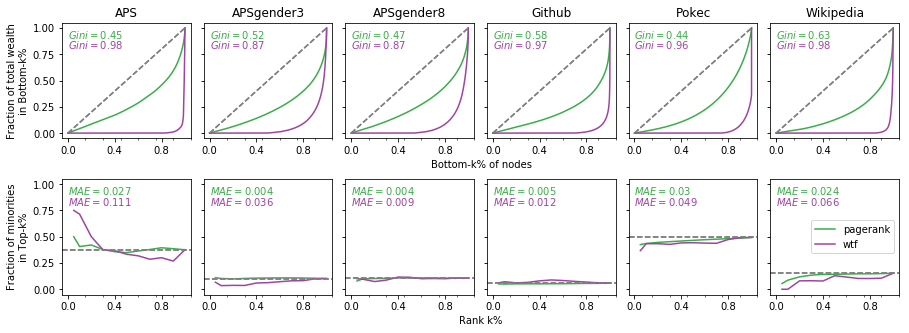

In [15]:
fn = os.path.join(PLOTS, 'vh_inequalities_empirical.pdf')
viz.plot_vh_inequalities_per_dataset_and_metric(df_metadata_empirical, df_rank_empirical, df_summary_empirical, fn=fn)

<h2>II. Model-Fit: Modelling underlying link mechanisms</h2>

In [115]:
df_metadata_fit = network.load_all_datasets_node_metadata_fit(DATASETS, MODELS, OUTPUT)

2020-04-02 00:39:16	../results-batch/all_datasets_metadata_fit.csv saved!


<h3>Power-law degree distributions</h3>

../plots/degree_distributions_fit.pdf saved!


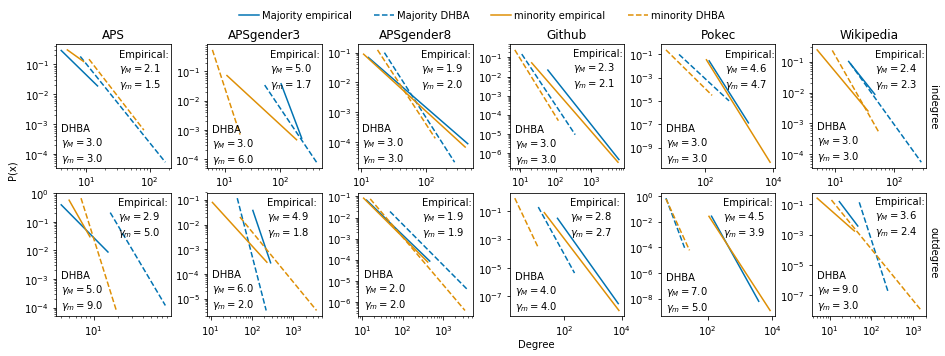

In [207]:
fn = os.path.join(PLOTS, 'degree_distributions_fit.pdf')
viz.plot_degree_distributions_groups_fit(df_summary_empirical,
                                         df_metadata_empirical, 
                                         df_metadata_fit, 
                                         model=MODEL,
                                         fn=fn)

<h3>Vertical and Horizontal inequalities</h3>

In [120]:
df_rank_fit = ranking.rank_fit(df_summary_empirical.dataset.unique(), OUTPUT) 


2020-04-02 00:42:00	APS

2020-04-02 00:43:28	APSgender3

2020-04-02 00:46:27	APSgender8

2020-04-02 00:49:24	Github

2020-04-02 00:53:04	Pokec

2020-04-02 00:56:45	Wikipedia
2020-04-02 00:58:59	../results-batch/rank_fit.csv saved!


In [121]:
df_rank = df_rank_empirical.copy()
df_rank = df_rank.append(df_rank_fit.copy())

../plots/vh_inequalities_fit_grouped.pdf saved!


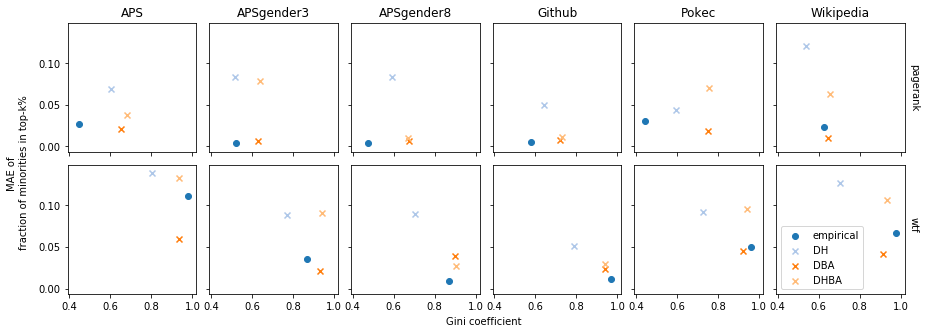

In [126]:
group = True
all = True
fn = os.path.join(PLOTS, 'vh_inequalities_fit{}.pdf'.format('_grouped' if group else ''))
viz.plot_vh_inequalities_fit(df_rank, group=group, all=all, fn=fn)

In [216]:
df_rank_empirical.head()

,kind,metric,dataset,gini,mae,epoch,rank,fmt
0,empirical,indegree,APS,0.696307,0.176939,0,5.0,0.000000
1,empirical,indegree,APS,0.696307,0.176939,0,10.0,0.000000
2,empirical,indegree,APS,0.696307,0.176939,0,20.0,0.111111
3,empirical,indegree,APS,0.696307,0.176939,0,30.0,0.166667
4,empirical,indegree,APS,0.696307,0.176939,0,40.0,0.166667


In [241]:
df_diff = None

for dataset in df_rank_fit.dataset.unique():
    for model in df_rank_fit.kind.unique():
        for metric in df_rank_fit['metric'].unique():
            for rank in df_rank_fit['rank'].unique():
                tmpf = df_rank_fit.query("dataset==@dataset & kind==@model & metric==@metric & rank==@rank").copy()
                tmpe = df_rank_empirical.query("dataset==@dataset & metric==@metric & rank==@rank").copy()
                
                #rint(tmpe.iloc[0].mae)
                #print(tmpf.iloc[0].mae)
                
                tmp = tmpf.copy()    
                tmp.loc[:,'y'] = tmp.apply(lambda row: abs(tmpe.iloc[0].mae - row.mae), axis=1)
                tmp.loc[:,'x'] = tmp.apply(lambda row: abs(tmpe.iloc[0].gini - row.gini), axis=1)
                
                if df_diff is None:
                    df_diff = tmp.copy()
                else:
                    df_diff = df_diff.append(tmp, ignore_index=True)
        

In [242]:
df_diff.loc[:,'z'] = df_diff.apply(lambda row: row.x+row.y, axis=1)
df_diff.head()

,kind,metric,dataset,gini,mae,epoch,rank,fmt,y,x,z
0,DHBA,indegree,APS,0.724680,0.152323,2,5.0,0.0,0.024616,0.028373,0.052989
1,DHBA,indegree,APS,0.716762,0.117097,7,5.0,0.0,0.059841,0.020455,0.080296
2,DHBA,indegree,APS,0.733703,0.138566,4,5.0,0.0,0.038373,0.037396,0.075769
3,DHBA,indegree,APS,0.721176,0.071847,1,5.0,0.5,0.105092,0.024870,0.129961
4,DHBA,indegree,APS,0.727808,0.112825,6,5.0,0.0,0.064114,0.031501,0.095615


In [253]:
tmp = df_diff.groupby(['kind','metric','dataset','epoch'])['z'].mean().reset_index()
tmp = tmp.groupby(['kind','metric','dataset'])['z'].mean().reset_index()
tmp.head()

,kind,metric,dataset,z
0,DBA,circle_of_trust,APS,0.031947
1,DBA,circle_of_trust,APSgender3,0.139386
2,DBA,circle_of_trust,APSgender8,0.076568
3,DBA,circle_of_trust,Github,0.015254
4,DBA,circle_of_trust,Pokec,0.066230


In [255]:
tmp.query("metric!='circle_of_trust'").sort_values(['dataset','metric','z'])

,kind,metric,dataset,z
66,DHBA,indegree,APS,0.098878
6,DBA,indegree,APS,0.111658
36,DH,indegree,APS,0.282325
72,DHBA,outdegree,APS,0.056676
42,DH,outdegree,APS,0.057168
12,DBA,outdegree,APS,0.059695
48,DH,pagerank,APS,0.200456
18,DBA,pagerank,APS,0.216838
78,DHBA,pagerank,APS,0.257819
84,DHBA,wtf,APS,0.089467


<h2>III. Model-Tuning: Network structure vs Inequalities</h2>

<div style='color: blue;'>
    $N = 2000$ <br />
    $m=2$ <br />
    $\gamma_m = \gamma_M = 2.5$ <br />
    $density = 0.001$
</div>

In [ ]:
df_rank_synthetic = ranking.rank_vh_inequalities_synthetic(model, OUTPUT)

<h3>Vertical and Horizontal inequalities</h3>

In [ ]:
metric = 'pagerank'
sym = True

fn = os.path.join(PLOTS, 'vh_inequalities_synthetic_{}_{}_{}sym.pdf'.format(model, metric, 'a' if not sym else ''))
viz.plot_vh_inequalities_synthetic(df_rank_synthetic, metric=metric, sym=sym, fn=fn)

In [ ]:
sym = False

fn = os.path.join(PLOTS, 'vh_inequalities_synthetic_{}_{}_{}sym.pdf'.format(model, metric, 'a' if not sym else ''))
viz.plot_vh_inequalities_synthetic(df_rank_synthetic, metric=metric, sym=sym, fn=fn)